In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm, skew

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Workflow
=========

1. **Load the data and understand the problem**
2. **EDA (Exploratory Data Analysis)**
3. **Data Preprocessing**
   - Outliers 
   - Missing Values 
   - Feature Engineering 
   - Encoding and Scaling
4. **Evaluation Metric**
5. **Get data ready for modeling**
6. **Choose and run models**
7. **Feature Importance and Selection**
8. **Hyperparameter Tuning**
9. **Final model selection and submission**


# Load the data and understand the problem

In [3]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_sample = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
print('Shape of the training set: ' + format(df_train.shape))
print('Shape of the test set: ' + format(df_test.shape))

Shape of the training set: (1460, 81)
Shape of the test set: (1459, 80)


In [8]:
df_train = df_train.set_index('Id')
df_test = df_test.set_index('Id')

In [9]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# EDA (Exploratory Data Analysis)

<Axes: ylabel='SalePrice'>

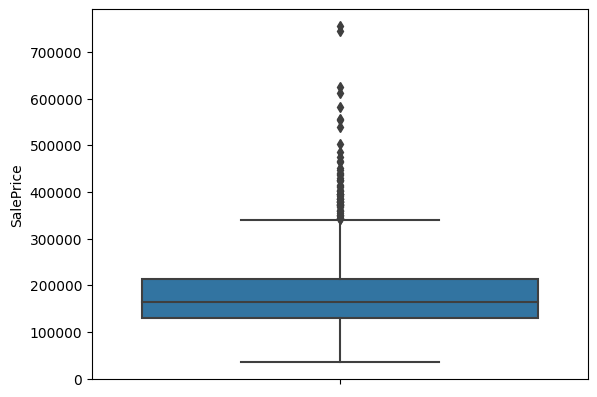

In [10]:
sns.boxplot(data=df_train, y='SalePrice')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

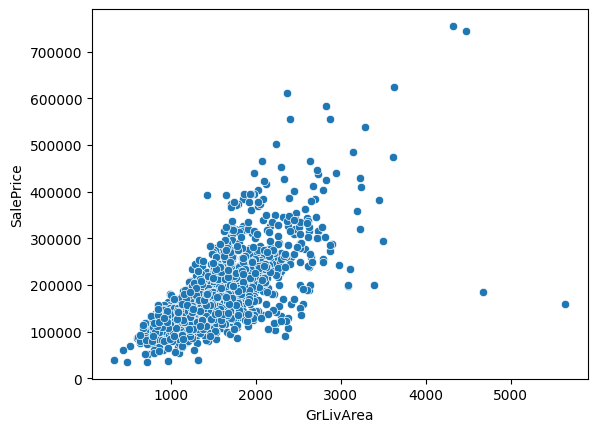

In [11]:
sns.scatterplot(data=df_train,x='GrLivArea',y='SalePrice')

In [12]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

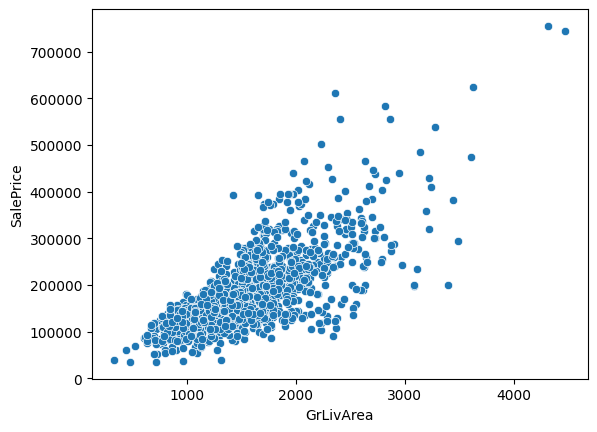

In [13]:
sns.scatterplot(data=df_train,x='GrLivArea',y='SalePrice')

In [14]:
df_train.select_dtypes(include=[float,int]).corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.405399,-0.142033,0.032522,-0.059275,0.027757,0.040503,0.022785,-0.074434,-0.065624,-0.140810,-0.253194,-0.262529,0.308672,0.046486,0.076778,0.003294,-0.002308,0.131773,0.177415,-0.023455,0.281752,0.040335,-0.046009,0.084992,-0.040248,-0.099790,-0.012681,-0.006659,-0.012002,-0.043813,-0.026004,0.008090,-0.007675,-0.013581,-0.021386,-0.084276
LotFrontage,-0.405399,1.000000,0.388580,0.235266,-0.056437,0.116552,0.081427,0.163938,0.146986,0.055306,0.139980,0.322824,0.406946,0.066185,0.041701,0.355459,0.076826,-0.005051,0.196322,0.042378,0.273832,-0.003934,0.336210,0.245636,0.060709,0.293489,0.322919,0.081603,0.116992,0.015230,0.074539,0.046278,0.116320,0.004992,0.026139,0.007813,0.370584
LotArea,-0.142033,0.388580,1.000000,0.091392,-0.002723,0.007462,0.007500,0.084529,0.175320,0.114297,-0.003251,0.223914,0.269234,0.041026,0.005536,0.232927,0.147189,0.050068,0.119679,0.007363,0.120311,-0.016796,0.175425,0.261176,-0.032333,0.152484,0.163680,0.168621,0.061861,-0.016505,0.021362,0.045288,0.036491,0.039072,0.005744,-0.013699,0.268179
OverallQual,0.032522,0.235266,0.091392,1.000000,-0.090442,0.571368,0.549827,0.403421,0.222467,-0.058324,0.308990,0.538595,0.469092,0.290052,-0.030129,0.589414,0.104020,-0.039435,0.548420,0.270466,0.101601,-0.184077,0.420621,0.392472,0.546673,0.600741,0.557230,0.236753,0.297186,-0.113176,0.030991,0.066298,0.044758,-0.031238,0.072531,-0.026575,0.795774
OverallCond,-0.059275,-0.056437,-0.002723,-0.090442,1.000000,-0.375572,0.074615,-0.126669,-0.042987,0.040034,-0.136723,-0.174931,-0.144717,0.030504,0.025414,-0.077423,-0.053674,0.117676,-0.193473,-0.059971,0.013099,-0.087170,-0.055782,-0.022406,-0.323776,-0.185275,-0.150503,-0.002675,-0.029800,0.070120,0.025426,0.054632,0.002321,0.068728,-0.003735,0.043795,-0.077948
YearBuilt,0.027757,0.116552,0.007462,0.571368,-0.375572,1.000000,0.592105,0.312832,0.249818,-0.048683,0.148836,0.400266,0.281253,0.006968,-0.183770,0.194397,0.185012,-0.037804,0.467146,0.241123,-0.070992,-0.174630,0.091220,0.144982,0.825317,0.537301,0.477998,0.223700,0.184116,-0.387093,0.031578,-0.049972,-0.005171,-0.034273,0.012975,-0.013250,0.523608
YearRemodAdd,0.040503,0.081427,0.007500,0.549827,0.074615,0.592105,1.000000,0.175677,0.123039,-0.067377,0.180958,0.294941,0.238769,0.137423,-0.062289,0.286758,0.116804,-0.011977,0.437927,0.181788,-0.040869,-0.149406,0.188418,0.109898,0.641604,0.419882,0.370000,0.204591,0.222790,-0.193551,0.045504,-0.038360,-0.003426,-0.010160,0.022020,0.036145,0.507717
MasVnrArea,0.022785,0.163938,0.084529,0.403421,-0.126669,0.312832,0.175677,1.000000,0.239168,-0.071523,0.114406,0.343687,0.322969,0.166203,-0.069118,0.371256,0.075503,0.028190,0.271494,0.197218,0.102977,-0.036885,0.269217,0.241262,0.249091,0.363091,0.362983,0.156532,0.104809,-0.109421,0.019585,0.063476,-0.020570,-0.029649,-0.004238,-0.007097,0.482719
BsmtFinSF1,-0.074434,0.146986,0.175320,0.222467,-0.042987,0.249818,0.123039,0.239168,1.000000,-0.049622,-0.522303,0.467624,0.395113,-0.164290,-0.066658,0.142196,0.658507,0.073754,0.047811,-0.009175,-0.114992,-0.083043,0.011020,0.243002,0.148446,0.229077,0.273244,0.204993,0.072717,-0.103853,0.029177,0.068389,0.052981,0.004741,-0.004281,0.015767,0.409384
BsmtFinSF2,-0.065624,0.055306,0.114297,-0.058324,0.040034,-0.048683,-0.067377,-0.071523,-0.049622,1.000000,-0.209252,0.114290,0.103923,-0.098769,0.014760,-0.007138,0.160082,0.070860,-0.075969,-0.031696,-0.015664,-0.040839,-0.034238,0.048008,-0.087604,-0.037914,-0.017108,0.068312,0.004974,0.036406,-0.030041,0.088774,0.046350,0.004905,-0.015362,0.031618,-0.011422


<Axes: >

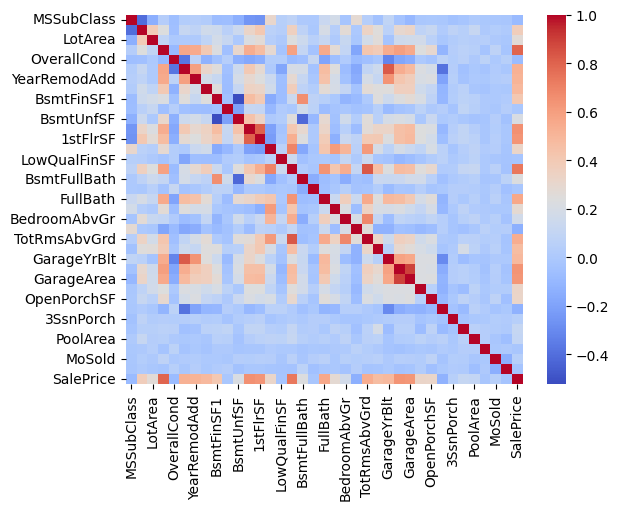

In [15]:
sns.heatmap(data=df_train.select_dtypes(include=[float, int]).corr(),cmap='coolwarm')

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

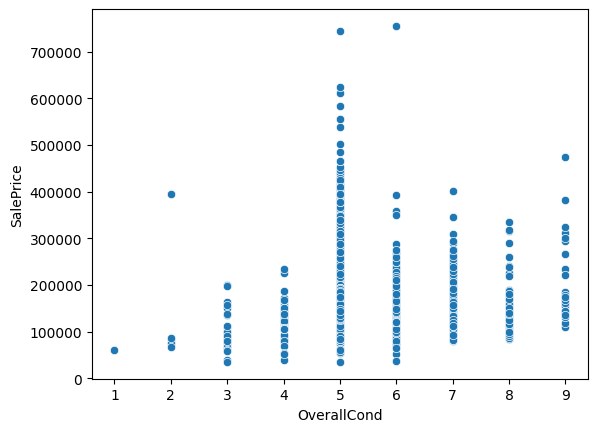

In [16]:
sns.scatterplot(data=df_train,x='OverallCond',y='SalePrice')

In [17]:
df_train = df_train.drop(df_train[(df_train['OverallCond']==2) & (df_train['SalePrice'] > 300000)].index)
df_train = df_train.drop(df_train[(df_train['OverallCond']==6) & (df_train['SalePrice'] > 600000)].index)

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

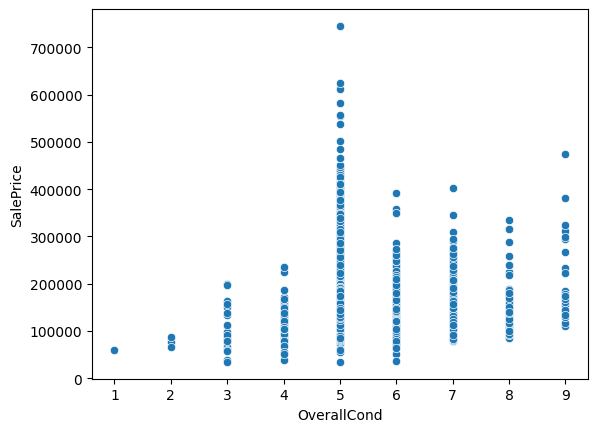

In [18]:
sns.scatterplot(data=df_train,x='OverallCond',y='SalePrice')

In [19]:
# numeric_columns = df_train.select_dtypes(include=[float, int])

# for col in numeric_columns.columns:
#     if col != 'SalePrice':
#         sns.scatterplot(x=col, y='SalePrice', data=numeric_columns)
#         plt.title(f'Scatterplot of {col} vs. SalePrice')
#         plt.show()

In [20]:
# columns_to_include = ['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF']

# sns.pairplot(df_train[columns_to_include])


 mu = 180392.01 and sigma = 77883.66



<function matplotlib.pyplot.show(close=None, block=None)>

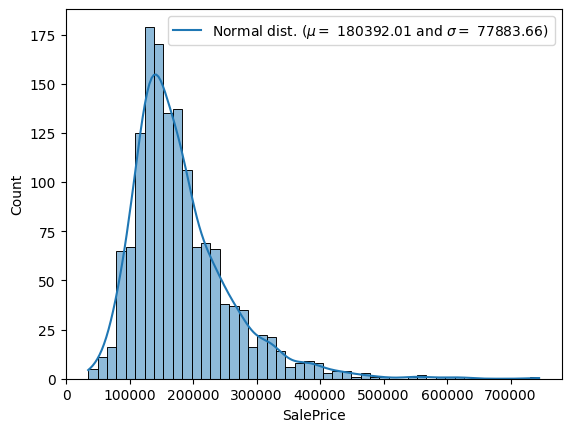

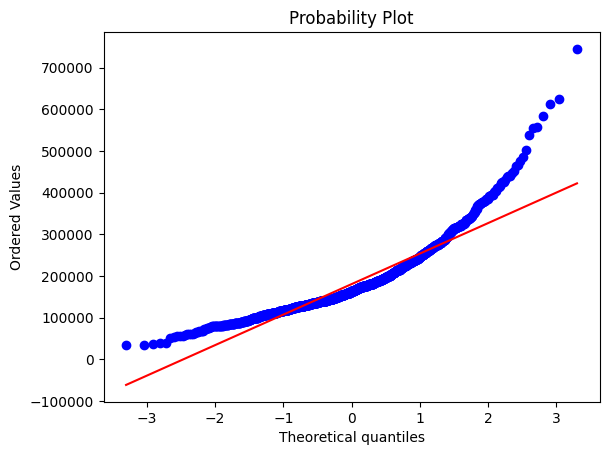

In [21]:
sns.histplot(data=df_train['SalePrice'], kde=True)

(mu, sigma) = stats.norm.fit(df_train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend([f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f})'], loc='best')

fig = plt.figure()
stats.probplot(df_train['SalePrice'], plot=plt)
plt.show


 mu = 180392.01 and sigma = 77883.66



<function matplotlib.pyplot.show(close=None, block=None)>

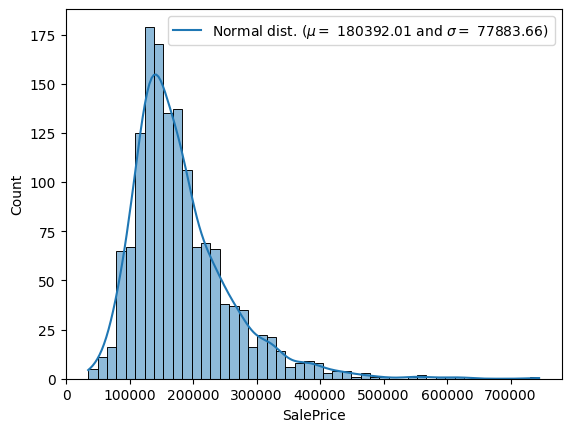

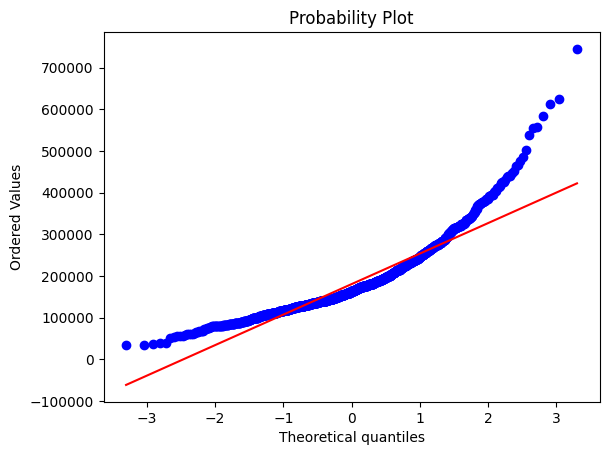

In [22]:
sns.histplot(df_train['SalePrice'], kde=True)

(mu, sigma) = stats.norm.fit(df_train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend([f'Normal dist. ($\mu=$ {mu:.2f} and $\sigma=$ {sigma:.2f})'], loc='best')

fig = plt.figure()
stats.probplot(df_train['SalePrice'], plot=plt)
plt.show

# Data Preprocessing

## Missing values

In [23]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
df_train['train_test'] = 1
df_test['train_test'] = 0
df_test['SalePrice'] = np.NaN
all_data = pd.concat([df_train,df_test])

In [25]:
count = all_data.isnull().sum().sort_values(ascending=False)
percentage = (all_data.isnull().sum()/len(all_data)) * 100
missing_data = pd.concat([count,percentage],axis=1,keys=['count','percentage'])
missing_data[missing_data['count'] > 0]

,count,percentage
PoolQC,2906,99.691252
MiscFeature,2810,96.397942
Alley,2717,93.207547
Fence,2344,80.411664
MasVnrType,1766,60.583190
SalePrice,1459,50.051458
FireplaceQu,1420,48.713551
LotFrontage,486,16.672384
GarageYrBlt,159,5.454545
GarageFinish,159,5.454545


In [26]:
for col in ['GarageArea','GarageCars','BsmtFinSF1','TotalBsmtSF','BsmtFinSF2','BsmtUnfSF','BsmtHalfBath','BsmtFullBath', 'GarageYrBlt']:
    all_data[col] = all_data[col].fillna(0)

for col in ['SaleType','Exterior1st','Exterior2nd','KitchenQual','Functional','Electrical','MSZoning','MasVnrArea']:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

for col in ['BsmtFinType1','BsmtFinType2','BsmtQual','BsmtCond','BsmtExposure','GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu','MasVnrType','Fence','Alley','MiscFeature','PoolQC']:
    all_data[col] = all_data[col].fillna('None')
    
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))

all_data = all_data.drop(['Utilities'], axis=1)

In [27]:
count = all_data.isnull().sum().sort_values(ascending=False)
percentage = (all_data.isnull().sum()/len(all_data)) * 100
missing_data = pd.concat([count,percentage],axis=1,keys=['count','percentage'])
missing_data[missing_data['count'] > 0]

,count,percentage
SalePrice,1459,50.051458


In [28]:
# numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# # Check the skew of all numerical features
# skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# print("\nSkew in numerical features: \n")
# skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.head(10)

In [29]:
# skewness = skewness[abs(skewness) > 0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     #all_data[feat] += 1
#     all_data[feat] = boxcox1p(all_data[feat], lam)
    
# #all_data[skewed_features] = np.log1p(all_data[skewed_features])

## Feature Engineering 

In [30]:
all_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'O

In [31]:
all_data['TotalAreaSF'] = all_data['1stFlrSF'] + all_data['2ndFlrSF'] + all_data['LowQualFinSF'] + all_data['TotalBsmtSF']

In [32]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [33]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test,TotalAreaSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0,1,2566.0
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0,1,2524.0
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0,1,2706.0
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.0,1,2473.0
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0,1,3343.0


## Encoding and Scaling


In [34]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

label_encoder = LabelEncoder()

for c in cols: 
    all_data[c] = label_encoder.fit_transform(all_data[c])

print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2915, 81)


In [35]:
all_data = pd.get_dummies(all_data)
all_data = all_data.astype(int, errors='ignore')  # 'ignore' will leave the original non-numeric values

print(all_data.shape)

(2915, 222)


In [36]:
# from sklearn.preprocessing import StandardScaler


# cols_to_scale = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
#                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
#                  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice',
#                  'TotalAreaSF']


# all_data_scaled = all_data.copy()

# scaler = StandardScaler()
# all_data_scaled[cols_to_scale] = scaler.fit_transform(all_data[cols_to_scale])

# print('Shape of all_data: {}'.format(all_data_scaled.shape))

# Getting data ready for modeling

In [37]:
all_data['train_test'].value_counts()

train_test
0    1459
1    1456
Name: count, dtype: int64

In [38]:
df_train = all_data[all_data['train_test']>0.5].drop('train_test',axis=1)
df_test = all_data[all_data['train_test']<0.5].drop(['train_test','SalePrice'],axis=1)

# df_train_scaled = all_data_scaled[all_data_scaled['train_test']>0.5].drop('train_test',axis=1)
# df_test_scaled = all_data_scaled[all_data_scaled['train_test']<.5].drop(['train_test','SalePrice'],axis=1)

In [39]:
print('Shape of the training set: ' + format(df_train.shape))
print('Shape of the test set: ' + format(df_test.shape))

Shape of the training set: (1456, 221)
Shape of the test set: (1459, 220)


In [40]:
X_train = df_train.drop('SalePrice',axis=1)
y_train = df_train['SalePrice']
X_test = df_test

# X_train_scaled = df_train_scaled.drop('SalePrice',axis=1)
# y_train_scaled = df_train_scaled['SalePrice']
# X_test_scaled = df_test_scaled

# Choose and run models

In [41]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from math import sqrt
from scipy.stats import randint, uniform
from xgboost import XGBRegressor 
from lightgbm import LGBMRegressor

In [42]:
def rmse_cv(model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv = np.sqrt(-cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=kf))
    print(cv)
    print(cv.mean())
    
# def rmse_cv_scaled(model):
#     kf = KFold(n_splits=10, shuffle=True, random_state=42)
#     cv = np.sqrt(-cross_val_score(model,X_train_scaled,y_train_scaled,scoring='neg_mean_squared_error',cv=kf))
#     print(cv)
#     print(cv.mean())

def Rgr_performance(regressor, model_name):
    print(model_name)
    print('Best Score: ' + str(regressor.best_score_))
    print('Best Parameters: ' + str(regressor.best_params_))
    
def rmse_scorer(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    return -rmse 


In [43]:
# RF = RandomForestRegressor()

# rmse_cv(RF)
# rmse_cv_scaled(RF)

In [44]:
# LR = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

# rmse_cv(LR)
# rmse_cv_scaled(LR)

In [45]:
# model_xgb = xgb.XGBRegressor()

# rmse_cv(model_xgb)
# rmse_cv_scaled(model_xgb)

In [46]:
# model_lgb = lgb.LGBMRegressor()

# rmse_cv(model_lgb)
# rmse_cv_scaled(model_lgb)

In [47]:
# GBoost = GradientBoostingRegressor()

# rmse_cv(GBoost)
# rmse_cv_scaled(GBoost)

In [48]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

rmse_cv(lasso)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.383e+11, tolerance: 6.862e+08
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.471e+11, tolerance: 7.184e+08
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.535e+11, tolerance: 7.309e

[28357.13624238 28960.86252722 24829.11123594 27453.18061995
 29986.98686143]
27917.455497385992


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.470e+11, tolerance: 6.968e+08
  model = cd_fast.enet_coordinate_descent(


# Hyperparamater Tuning


In [49]:
# rf = RandomForestRegressor()

# param_dist = {
#     'n_estimators': [int(x) for x in range(100, 1001, 100)],  # Number of trees in the forest
#     'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
#     'max_depth': [int(x) for x in range(10, 110, 10)],  # Maximum number of levels in the tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
#     'bootstrap': [True, False]  # Method of selecting samples for training each tree
# }


# rgr_rf = RandomizedSearchCV(rf, param_distributions=param_dist, cv=10, scoring=make_scorer(rmse_scorer), verbose=True, n_jobs=-1)
# best_rgr_rf = rgr_rf.fit(X_train,y_train)
# Rgr_performance(best_rgr_rf, 'Random Forests')

# Random Forests
# Best Score: -0.1353581270216449
# Best Parameters: {'n_estimators': 900, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}

In [50]:
# lr = LinearRegression()

# param_grid = {
#     'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
#     'copy_X': [True, False],  # If True, X will be copied; else, it may be overwritten
#     'n_jobs': [None, -1],  # Number of jobs to use for computation. -1 means using all processors.
# }

# rgr_lr = GridSearchCV(lr, param_grid=param_grid, cv=10, scoring=make_scorer(rmse_scorer), verbose=True, n_jobs=-1)
# best_rgr_lr = rgr_lr.fit(X_train, y_train)
# Rgr_performance(best_rgr_lr, 'Linear Regression')

# Linear Regression
# Best Score: -0.12161487894712275
# Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None}



In [51]:
# xgb = XGBRegressor()

# param_dist = {
#     'n_estimators': [int(x) for x in range(100, 1001, 100)],
#     'max_depth': [int(x) for x in range(3, 15)],
#     'learning_rate': [0.01, 0.1, 0.2, 0.3],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0],
#     'gamma': [0, 1, 5],
#     'reg_alpha': [0, 0.1, 1],
#     'reg_lambda': [0, 0.1, 1],
#     'min_child_weight': [1, 5, 10],
# }


# rgr_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist, cv=10, scoring=make_scorer(rmse_scorer), verbose=True, n_jobs=-1)
# best_rgr_xgb = rgr_xgb.fit(X_train, y_train)
# Rgr_performance(best_rgr_xgb, 'XGBoost')

# XGBoost
# Best Score: -0.11825728233008001
# Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}

In [52]:
# lgbm = LGBMRegressor()

# param_dist = {
#     'n_estimators': randint(50, 500),  # Number of boosting rounds
#     'max_depth': randint(5, 30),  # Maximum tree depth
#     'learning_rate': uniform(0.01, 0.3),  # Boosting learning rate
#     'subsample': uniform(0.8, 0.2),  # Subsample ratio of the training instance
#     'colsample_bytree': uniform(0.8, 0.2),  # Subsample ratio of columns when constructing each tree
#     'min_child_samples': randint(5, 20),  # Minimum number of data needed in a child (leaf) node
# }

# rgr_lgbm = RandomizedSearchCV(lgbm, param_distributions=param_dist, cv=10, scoring=make_scorer(rmse_scorer), verbose=True, n_jobs=-1)
# best_rgr_lgbm = rgr_lgbm.fit(X_train, y_train)
# Rgr_performance(best_rgr_lgbm, 'LGBMRegressor')

# LGBMRegressor
# Best Score: -0.12286615518382667
# Best Parameters: {'colsample_bytree': 0.8813695161038817, 'learning_rate': 0.03746274969215181, 'max_depth': 12, 'min_child_samples': 12, 'n_estimators': 310, 'subsample': 0.8401043368497572}

In [53]:
# GBoost = GradientBoostingRegressor()

# param_dist = {
#     'n_estimators': randint(50, 500),
#     'learning_rate': uniform(0.01, 0.3),
#     'max_depth': randint(3, 15),
#     'min_samples_split': randint(2, 20),
#     'min_samples_leaf': randint(1, 20),
#     'subsample': uniform(0.8, 0.2),
#     'max_features': ['auto', 'sqrt', 'log2', None],
# }

# rgr_gboost = RandomizedSearchCV(GBoost, param_distributions=param_dist, cv=10, scoring=make_scorer(rmse_scorer), verbose=True, n_jobs=-1)
# best_rgr_gboost = rgr_gboost.fit(X_train, y_train)
# Rgr_performance(best_rgr_gboost, 'Gradient Boosting Regressor')

# Gradient Boosting Regressor
# Best Score: -0.1148785114580331
# Best Parameters: {'learning_rate': 0.03611339052150231, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 19, 'min_samples_split': 8, 'n_estimators': 381, 'subsample': 0.9482948028690078}

In [54]:
lr = LinearRegression(
    copy_X=True,
    fit_intercept=True,
    n_jobs=None
)

rmse_cv(lr)

[28383.49283759 29036.45837744 24790.45659482 27657.49683669
 29526.02536268]
27878.786001843477


In [55]:
rf = RandomForestRegressor(
    n_estimators=900,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=1.0,
    max_depth=90,
    bootstrap=True
)

rmse_cv(rf)

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

submission = {'Id': df_test.index, 'SalePrice': pred}
submission = pd.DataFrame(data=submission)
submission.to_csv("rf_submission.csv", index=False)

[24602.94806873 25056.20253418 25960.36330574 24072.64088892
 28852.20462782]
25708.871885079403


In [56]:
lgbm = LGBMRegressor(
    colsample_bytree=0.8813695161038817,
    learning_rate=0.03746274969215181,
    max_depth=12,
    min_child_samples=12,
    n_estimators=310,
    subsample=0.8401043368497572
)

rmse_cv(lgbm)

lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)

submission = {'Id': df_test.index, 'SalePrice': pred}
submission = pd.DataFrame(data=submission)
submission.to_csv("lgbm_submission.csv", index=False)

[21111.91007234 22681.65955256 23565.52428559 24148.68735818
 25482.91733546]
23398.13972082444


In [57]:
gboost = GradientBoostingRegressor(
    learning_rate=0.03611339052150231,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=19,
    min_samples_split=8,
    n_estimators=381,
    subsample=0.9482948028690078
)

rmse_cv(gboost)

gboost.fit(X_train, y_train)
pred = gboost.predict(X_test)

submission = {'Id': df_test.index, 'SalePrice': pred}
submission = pd.DataFrame(data=submission)
submission.to_csv("gboost_submission.csv", index=False)

[22035.11433661 23647.66811853 22019.08837962 24201.62525185
 23716.2687013 ]
23123.952957582056


In [58]:
xgb = XGBRegressor(
    subsample=1.0,
    reg_lambda=1,
    reg_alpha=0,
    n_estimators=400,
    min_child_weight=1,
    max_depth=3,
    learning_rate=0.2,
    gamma=0,
    colsample_bytree=0.8
)

rmse_cv(xgb)

xgb.fit(X_train,y_train)
pred = xgb.predict(X_test)

submission = {'Id': df_test.index, 'SalePrice': pred}
submission = pd.DataFrame(data=submission)
submission.to_csv("xgb_submission.csv", index=False)

[20157.58617401 21029.59235596 23397.13386522 22898.4039609
 24631.03354014]
22422.749979247543


# Ensembling 


In [59]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [60]:
averaged_models = AveragingModels(models = (rf,lgbm,gboost,xgb))
rmse_cv(averaged_models)

averaged_models.fit(X_train,y_train)
pred = averaged_models.predict(X_test)
                
submission = {'Id': df_test.index, 'SalePrice': pred}
submission = pd.DataFrame(data=submission)
submission.to_csv("averaged_models_submission.csv", index=False)

[20440.97805824 21858.12253605 22422.68298019 22113.72317433
 24496.50994318]
22266.403338397162


In [61]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    def fit(self, X, y):
        self.base_models_ = [list() for _ in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[train_index], y.iloc[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_])
        return self.meta_model_.predict(meta_features)

In [62]:
stacked_averaged_models = StackingAveragedModels(base_models = (rf,lgbm,gboost,xgb),
                                                 meta_model = lasso)

rmse_cv(stacked_averaged_models)

stacked_averaged_models.fit(X_train, y_train)
pred = stacked_averaged_models.predict(X_test)

submission = {'Id': df_test.index, 'SalePrice': pred}
submission = pd.DataFrame(data=submission)

q1 = submission['SalePrice'].quantile(0.0045)
q2 = submission['SalePrice'].quantile(0.99)

submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)

submission.to_csv("submission.csv", index=False)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.414e+09, tolerance: 7.184e+08
  model = cd_fast.enet_coordinate_descent(


[20611.64531897 22102.96080155 21550.75966452 22322.67844034
 22943.11419345]
21906.231683764643


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.877e+09, tolerance: 8.832e+08
  model = cd_fast.enet_coordinate_descent(
